<a href="https://colab.research.google.com/github/AvanNorth/RobotsItis2022/blob/main/gareev_11_002_dz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


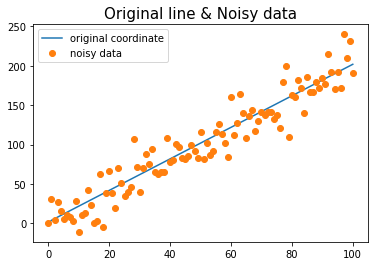

In [ ]:
# Creation of noisy data
import numpy as np
import random
import matplotlib.pyplot as plt
import math

N = 100
muPsi = 0
sigmaPsi = 1
muEta = 0
sigmaEta = 20
sigma = 1
iterations= 500
k_max = -37
k_min = 37
a = 2
b = 4
y = np.zeros(N+1)
z = [0] * (N+1)
filteredX = np.zeros(N+1)

x = range(N+1)

for t in range(0, N):
    y[t+1] = a * t + b
    z[t+1] = a * t + b + np.random.normal(muEta, sigmaEta, 1)

plt.title('Original line & Noisy data',fontsize=15)   
plt.plot(x, y, label='original coordinate')  
plt.plot(x, z, 'o' , label='noisy data')  
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


8


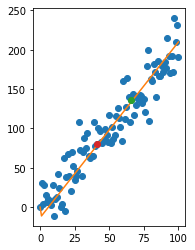

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


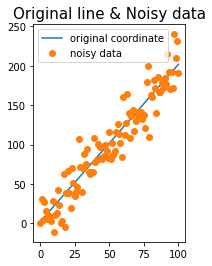

In [ ]:
RANSACx1 = 0
RANSACy1 = 0
RANSACx2 = 0
RANSACy2 = 0
bestScore = -1
line = np.zeros(N+1)

for k in range(iterations):
  score = 0

  good = False
  
  while (not good):
    y1 = np.random.choice(z)
    x1 = x[z.index(y1)]

    y2 = np.random.choice(z)
    x2 = x[z.index(y2)]

    good = not (x1 == x2 or y1 == y2)

  a1 = (y1 - y2) / (x1 - x2)
  b1 = y2 - a1*x2

  for t in range(0,N):
   error = y[t] - (a1 * z[t] + b1)
   if math.fabs(error) <= sigma:
     score+=1
  
  if score > bestScore:
    RANSACx1 = x1
    RANSACx2 = x2
    RANSACy1 = y1
    RANSACy2 = y2
    bestScore = score
    
for k in range(0,N):
  line[k + 1] = (y1 - y2) / (x1 - x2) * k + (y2 - a1*x2)

print(bestScore)

#Я честно пытался это все рисовать, но матлиб не хочет рисовать прямую как прямую.....

plt.subplot(1,2,1)
plt.plot(x, z, 'o' , label='noisy data')
plt.plot(x, line)
plt.plot(x1,y1, 'o')
plt.plot(x2,y2, 'o')  
plt.show()

plt.subplot(1,2,2)
plt.title('Original line & Noisy data',fontsize=15)   
plt.plot(x, y, label='original coordinate')  
plt.plot(x, z, 'o' , label='noisy data')  
plt.legend()